In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("Bankruptcy_Prediction.csv")

In [4]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

## EDA

In [5]:
df.shape

(6819, 96)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [8]:
# Checking for null values

df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [9]:
# Checking for duplicates

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6814    False
6815    False
6816    False
6817    False
6818    False
Length: 6819, dtype: bool

In [10]:
print(df['Bankrupt?'].value_counts())
print('-'* 30)
print('Solvent: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Bankrupt: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Bankrupt?
0    6599
1     220
Name: count, dtype: int64
------------------------------
Solvent:  96.77 % of the dataset
Bankrupt:  3.23 % of the dataset


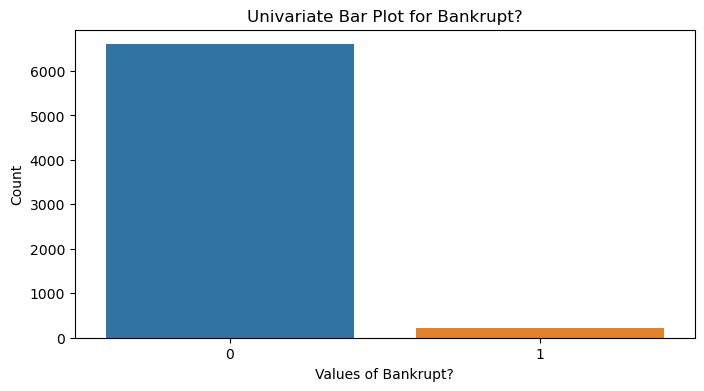

In [11]:
# Checking labels distributions

plt.figure(figsize=(8, 4))
sns.countplot(x = 'Bankrupt?', data = df)

# Set plot labels and title
plt.xlabel('Values of {}'.format('Bankrupt?'))
plt.ylabel('Count')
plt.title('Univariate Bar Plot for {}'.format('Bankrupt?'))

# Show the plot
plt.show()

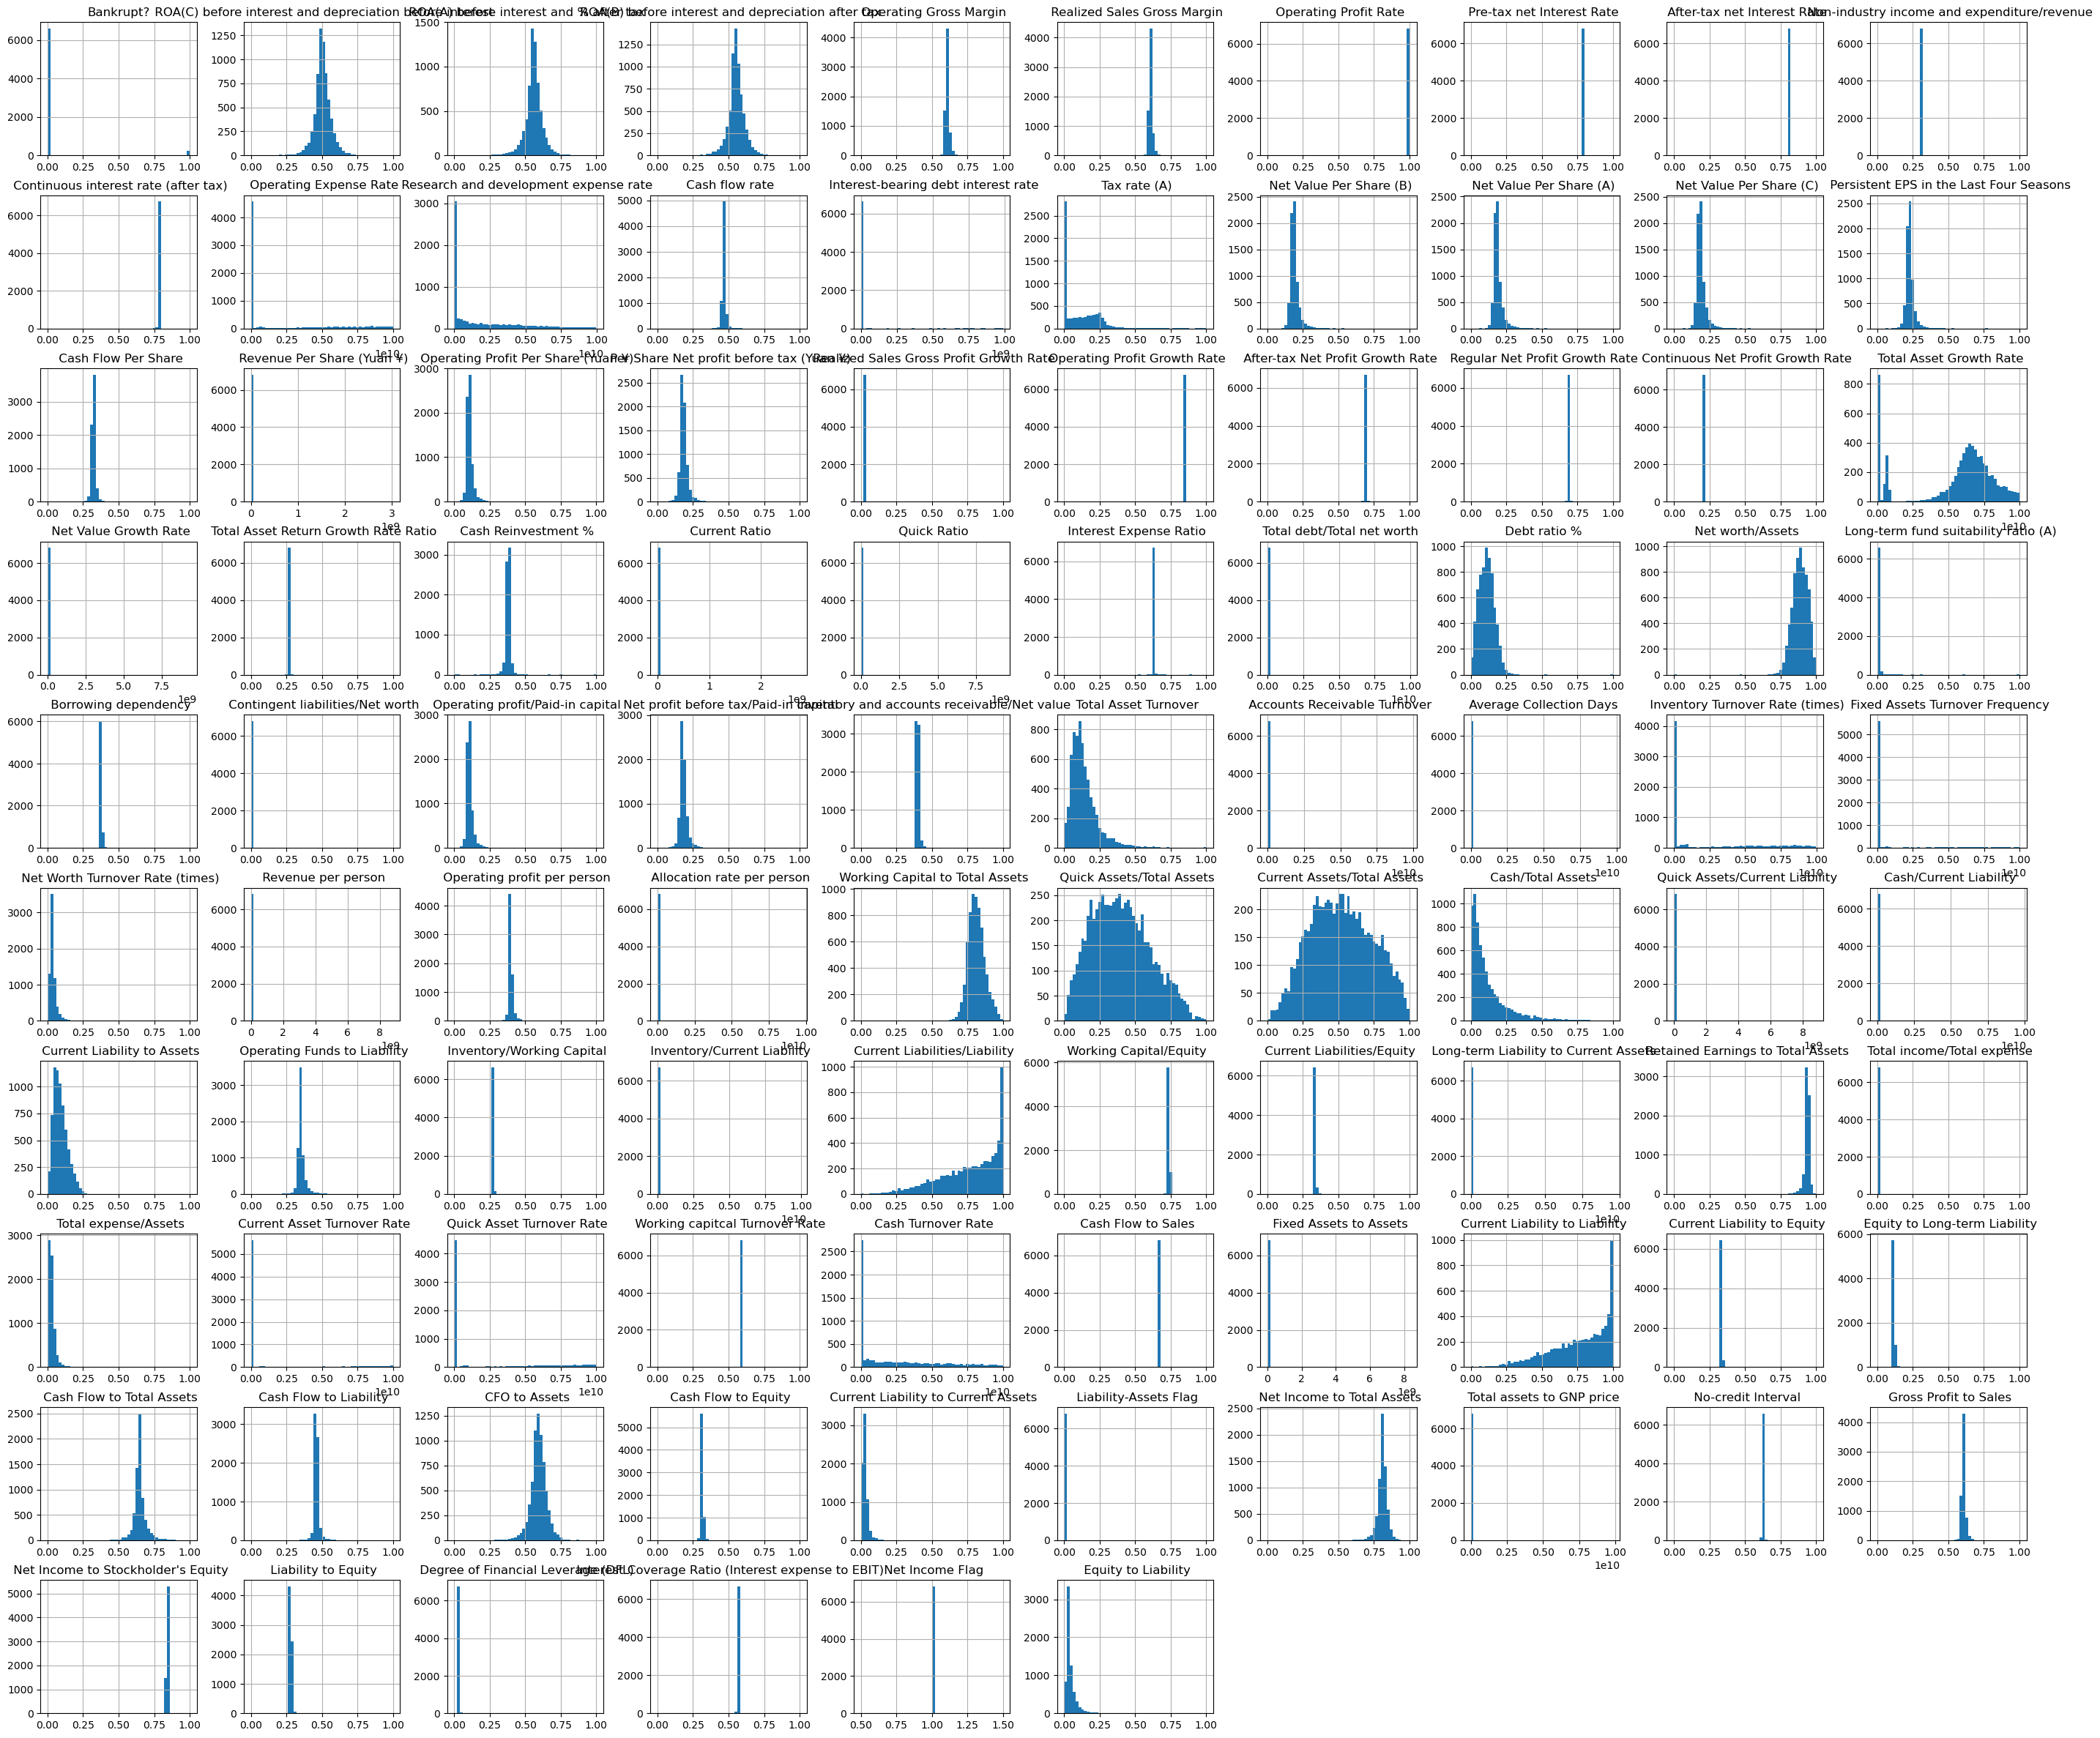

In [12]:
# Looking at the histograms of numerical data

df.hist(figsize = (35,30), bins = 50)
plt.show()

In [13]:
# # Pairplots 

# sns.pairplot(data=df)
# plt.show()

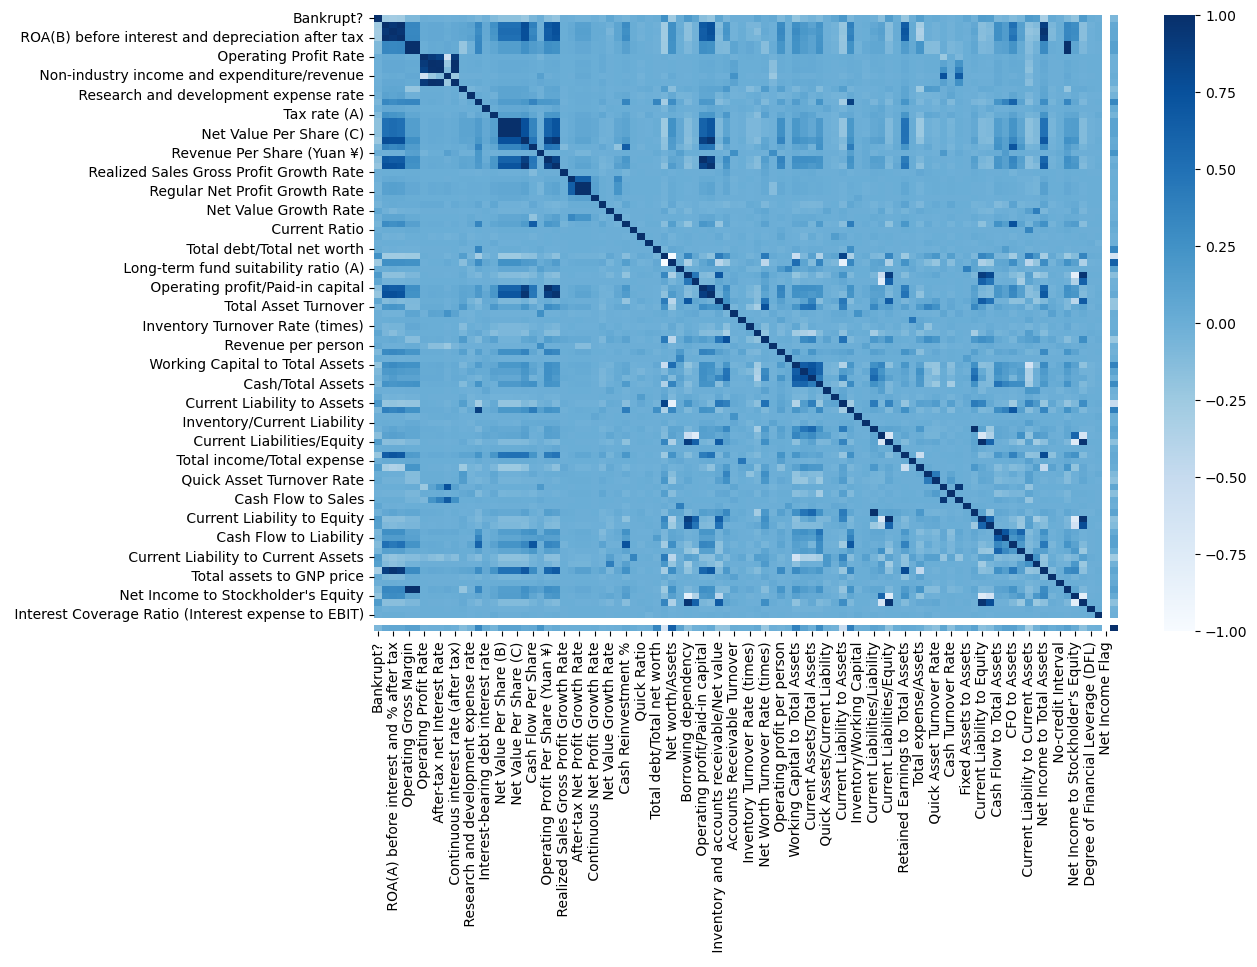

In [14]:
# Correlation Matrix/Heatmap

corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='Blues')
plt.show()

In [15]:
# Standardize the features
# Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df)) 
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,5.476811,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.616334,-0.750713,-0.545256,-0.151921,-0.829388,-1.279247,-1.275228,-1.276147,-1.794106,-0.671081,-0.025697,-0.471371,-1.375150,-0.025299,0.019997,-0.012031,-0.012262,-0.010299,-0.182259,-0.013721,-0.119118,-0.769297,-0.012111,-0.034237,-0.092520,-0.026226,1.750845,-1.750845,-0.133505,0.959784,0.041865,-0.471275,-1.460495,-0.332027,-0.540344,-0.045967,-0.038333,-0.661726,-0.407123,-0.155185,-0.017024,-0.237123,-0.038222,-2.393729,-1.155833,-1.520572,-0.861820,-0.020937,-0.072818,1.126267,-0.563752,-0.045371,-0.095887,-0.412896,-1.245334,0.568487,-0.094979,-1.232594,-0.043610,1.314027,-0.175421,1.299751,-0.019619,-0.685397,0.003948,-0.012111,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-0.034272,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,5.476811,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.616334,-0.750713,-0.326632,-0.151921,-0.829388,-0.251878,-0.250429,-0.251550,-0.597379,-0.303533,-0.025697,-0.550058,-0.435312,-0.027130,0.010035,0.039473,0.039663,-0.001930,0.207732,-0.013721,0.027847,-0.143117,-0.012111,-0.034237,0.372093,-0.026226,1.075727,-1.075727,-0.132282,0.129305,-0.010932,-0.548362,-0.446793,-0.355356,-0.762702,-0.045967,-0.038333,2.220288,-0.116896,-0.357471,-0.017024,-0.277557,-0.038222,-1.067133,-1.351081,-1.558280,-0.783873,-0.020937,-0.072818,-0.670363,-0.361990,1.169887,-0.095887,-2.192039,-0.328953,-0.123797,-0.094979,-0.143474,-0.026740,-0.135126,-0.423919,1.640522,-0.010126,0.006134,0.004193,-0.012111,-2.192039,-0.123797,0.269947,-0.182201,-0.095129,-0.449376,-0.109511,0.527485,-0.034272,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573
2,5.476811,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,-0.616334,-0.740898,-0.523098,-0.151921,-0.829388,-0.381876,-0.380102,0.090822,-1.450153,-0.930172,-0.025697,-0.599601,-1.252562,0.029163,0.010605,0.022853,0.022981,-0.003748,0.611527,-0.013721,-0.006595,-0.519094,-0.012111,-0.034237,-0.120983,-0.026226,1.749724,-1.749724,-0.130825,0.272560,0.048714,-0.599655,-1.126595,0.309321,-1.251890,-0.045967,-0.038333,-0.641712,0.662558,-0.687284,-0.017024,-0.571652,-0.038222,0.260402,-0.296712,0.369252,-0.884109,-0.020937,10.391338,0.148933,-0.486462,0.005772,-0.095887,-1.526996,0.591934,0.249651,-0.094979,-0.971327,-0.040430,-0.287204,-0.423919,-0.641164,0.055319,-0.582280,0.004340,-0.012111,-1.526996,0.249651,0.116638,-0.147060,-0.086679,-0.937979,-0.082328,-0.199721,-0.034272,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960
3,5.476811,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,-0.616334,-0.750713,-0.101310,-0.151921,-0.829388,-1.092453,-1.088901,-1.089856,-1.055034,-0.102688,-0.025697,-1.121264,-1.077762,-0.029953,0.002370,-0.002641,-0.002910,-0.007039,-0.216772,-0.013721,-0.090968,0.212198,-0.012111,-0.034237,-0.067866,-0.026226,0.710131,-0.710131,-0.132707,0.312459,-0.049430,-1.124902,-1.142029,-0.340373,-0.510696,-0.045967,-0.038333,1.533654,3.286302,-0.287110,-0.017024,-0.677748,-0.038222,-1.496543,-1.181075,-1.359304,-0.755844,-0.020937,-0.072818,0.159921,-0.145444,-0.077837,-0.095887,-0.705262,-0.513105,0.007354,-0.094979,-1.088734,-0.059344,-0.185032,2.461629,1.151589,-0.013113,-0.150414,-0.001243,-0.012111,-0.705262,0.007354,0.261976,-1.492364,-0.445261,0.182559,-1.018533,1.158899,-0.034272,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-

## Feature Selection

In [16]:
# Applying PCA
# Taking no. of Principal Components as 16
pca = PCA(n_components = 16)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-7.805386,0.516845,0.317202,1.005684,-0.166000,1.903094,0.753466,-1.293121,0.681569,2.600687,1.048627,0.698485,-0.115580,0.283534,0.184482,-0.776067
1,-3.179073,-0.819259,2.167090,2.456997,-0.843769,1.078883,0.365999,-1.435131,0.520470,1.338704,-0.805600,-0.456629,0.688653,0.828218,0.353217,-0.659958
2,-4.782747,-0.244111,0.317730,0.712473,-0.338607,0.279028,0.033288,-0.700562,0.703418,2.467329,-2.000863,0.586166,0.119919,1.374324,-0.656163,-2.161283
3,-6.294096,-1.236029,1.308766,2.144748,-0.734147,1.450377,-0.519526,0.099733,-0.543656,1.171792,2.096118,0.563423,0.672505,0.760547,-0.002881,-1.041106
4,-2.819903,-0.035496,-0.797728,0.877890,-0.207195,0.689888,-0.302095,0.098102,-0.432677,0.092922,1.760366,1.521441,-0.085436,-0.215301,-0.029498,-0.561676


In [17]:
# Divinding the data into Independent and Dependented Features

X = data_pca
print(X)
y = df.iloc[:,:1]
print(y)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -7.805386  0.516845  0.317202  1.005684 -0.166000  1.903094  0.753466   
1    -3.179073 -0.819259  2.167090  2.456997 -0.843769  1.078883  0.365999   
2    -4.782747 -0.244111  0.317730  0.712473 -0.338607  0.279028  0.033288   
3    -6.294096 -1.236029  1.308766  2.144748 -0.734147  1.450377 -0.519526   
4    -2.819903 -0.035496 -0.797728  0.877890 -0.207195  0.689888 -0.302095   
...        ...       ...       ...       ...       ...       ...       ...   
6814 -1.154805 -0.521751 -0.190452 -0.235800 -0.063245 -0.149648 -0.000033   
6815 -1.255230 -0.679624 -0.248372  0.447382 -0.231191 -0.841583 -0.163959   
6816  1.925290 -1.688768  1.410235 -0.956787  0.076393 -2.102293 -0.145130   
6817  1.861992 -0.390805  0.489859 -0.721807  0.043902  0.653955 -0.392872   
6818  1.260728 -2.332746  0.467642 -2.657249  0.125269 -4.538239  0.499112   

           PC8       PC9      PC10      PC11      PC12      PC1

In [18]:
# Divinding the Data into training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
2032  0.843744  0.199155 -1.033087 -0.340484  0.062549  0.664774 -1.029653   
107  -0.232165 -0.891502  3.281473  3.489687 -1.049094 -0.220197  0.124372   
4749 -2.301827 -3.046378 -0.199780 -2.260376  0.416484 -3.428011 -0.100150   
484  -4.739452 -0.269192 -0.739555  1.335560 -0.363186  0.691568 -0.597880   
361  -0.793908  0.246169  0.395689  1.840163 -0.424382  1.080638 -0.136160   
...        ...       ...       ...       ...       ...       ...       ...   
6026 -2.084627 -1.973342  1.426299  0.506531 -0.368635 -1.128132 -0.218587   
79    1.604047 -1.920370  1.777502 -1.756331  0.003270  0.813427 -0.787278   
3927  1.495459 -1.838115  0.050521 -3.469541  0.462577 -0.222351 -0.708873   
5955 -3.070954 -0.090757 -1.147230 -0.782473  0.074949  0.942337 -0.369523   
5640  0.671849  0.203667 -0.846776  0.347428 -0.092650 -0.424538 -0.428580   

           PC8       PC9      PC10      PC11      PC12      PC1

## Model Building

### 1. Logistic Regression

Accuracy: 0.9655425219941349

Confusion Matrix:
 [[1308    9]
 [  38    9]]


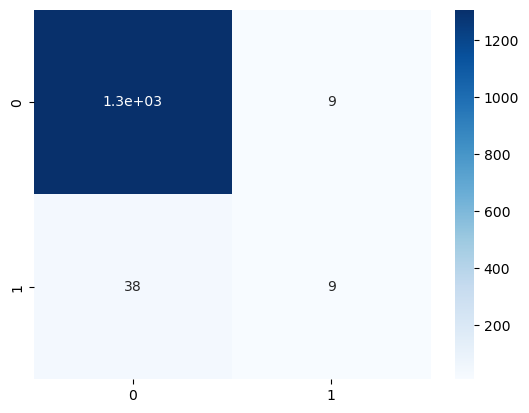


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1317
           1       0.50      0.19      0.28        47

    accuracy                           0.97      1364
   macro avg       0.74      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
accr = accuracy_score(y_test, y_pred)
print("Accuracy:", accr)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred))

Precision value equal to 61% for 1, means that 61% of Non-Bankrupted Company are classified as Non-Bankrupted Comapny and the rest (39%) of them are classified incorrectly. While precision value for positive reviews equal to 98% for 0, it means that 98% of Bankrupted Company are classified as Bankrupted Company and the rest (2%) of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 99% from the dataset are True for Bankrupted Company, and 30% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Logistic Regression model able to predict 98% correctly for negative reviews and 40% correctly for positive reviews.

In [20]:
# Performing Cross Validation To Check Overfitting Problem
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr,X,y,cv=10)
print("Accuracy Score:", scores.mean())
print("Standard Deviation:", scores.std())

Accuracy Score: 0.9715505918930676
Standard Deviation: 0.007845338536293829


After Performing Cross Validation as K = 10 The accuracy is 97.49%
from which we can determine that Model is not overfitted

### 2. Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model_tree = dt.fit(X_train,y_train)
model_tree

DecisionTreeClassifier()

Accuracy: 0.9714076246334311
Confusion Matrix
[[1302   15]
 [  24   23]]


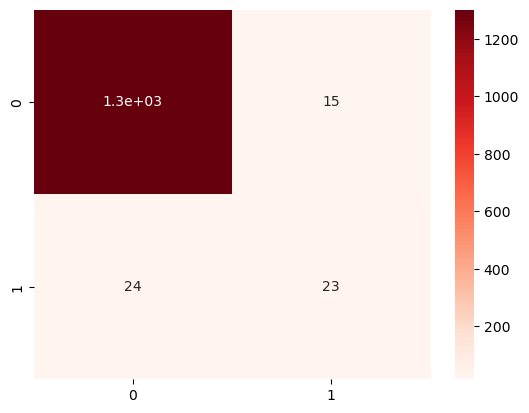


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1317
           1       0.61      0.49      0.54        47

    accuracy                           0.97      1364
   macro avg       0.79      0.74      0.76      1364
weighted avg       0.97      0.97      0.97      1364



In [22]:
y_pred1 = model_tree.predict(X_test)
accr1 = accuracy_score(y_test,y_pred1)
print("Accuracy:", accr1)

cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='Reds')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred1))

Precision value equal to 51% for 1, means that 51% of Non-Bankrupted Company are classified as Non-Bankrupted Comapny and the rest (49%) of them are classified incorrectly. While precision value for positive reviews equal to 98% for 0, it means that 98% of Bankrupted Company are classified as Bankrupted Company and 2% of them is classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 99% from the dataset are True for Bankrupted Company, and 38% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Decison Tree model able to predict 98% correctly for negative reviews and 44% correctly for positive reviews.

In [23]:
# Performing Cross Validation for Decison Tree
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_tree,X,y,cv=10)
print("Accuracy Score:", scores.mean())
print("Standard Deviation:", scores.std())

Accuracy Score: 0.9675922935479566
Standard Deviation: 0.013602165523956409


After Performing Cross Validation as K = 10 The accuracy is 96.80%
from which we can determine that Decision Model is not overfitted

### 3. Support Vector Machine Classifier

Accuracy: 0.9875366568914956
Confusion Matrix
[[1317    0]
 [  17   30]]


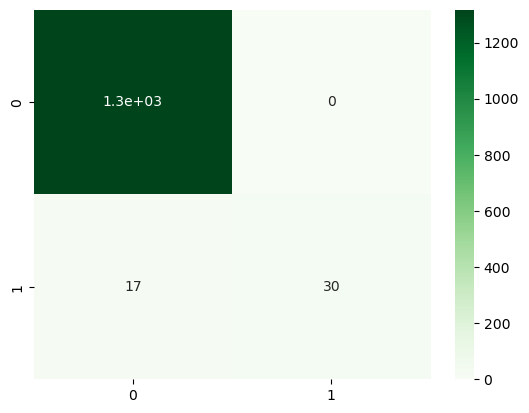


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1317
           1       1.00      0.64      0.78        47

    accuracy                           0.99      1364
   macro avg       0.99      0.82      0.89      1364
weighted avg       0.99      0.99      0.99      1364



In [24]:
from sklearn.svm import SVC

Sv = SVC(random_state=42)
model_Sv = Sv.fit(X_train,y_train)

y_pred2 = model_Sv.predict(X_test)
accr2 = accuracy_score(y_test,y_pred2)
print("Accuracy:", accr2)

cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='Greens')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred2))

Precision value equal to 94% for 1, means that 99% Non-Bankrupted Company are classified as Non-Bankrupted Comapny and 6% of them are classified incorrectly. While precision value for positive reviews equal to 99% for 0, it means that 99% of Bankrupted Company are classified as Bankrupted Company and 1% of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True for Bankrupted Company, and 64% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Support Vector Machine able to predict 99% correctly for negative reviews and 76% correctly for positive reviews.

In [25]:
# Cross Validation for Support vector Classifier

from sklearn.model_selection import cross_val_score

scores = cross_val_score(Sv,X,y,cv=10)
print("Accuracy Score:", scores.mean())
print("Standard Deviation:", scores.std())

Accuracy Score: 0.988121659970459
Standard Deviation: 0.005695447305024548


After Performing Cross Validation as K = 10 The accuracy is 98.90%
from which we can determine thatSupport Vector Model is not overfitted

### 4. Naive Bayes Classifier

In [26]:
# from sklearn.naive_bayes import MultinomialNB
# nb = MultinomialNB()
# model_Naive = nb.fit(X_train,y_train)
# model_Naive


### Negative values in data passed to MultinomialNB (input X)

### 4.1. GaussianNB 

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_GNaive = gnb.fit(X_train,y_train)
model_GNaive

GaussianNB()

Accuracy: 0.9428152492668622
Confusion Matrix
[[1280   37]
 [  41    6]]


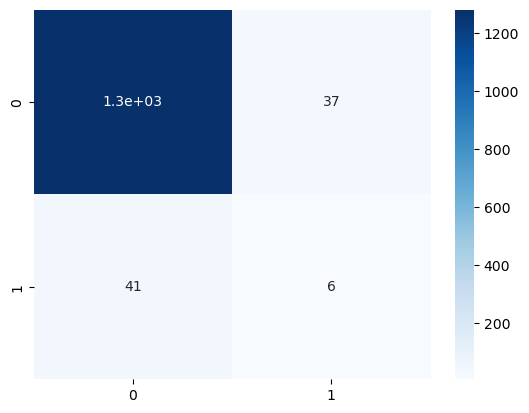


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1317
           1       0.14      0.13      0.13        47

    accuracy                           0.94      1364
   macro avg       0.55      0.55      0.55      1364
weighted avg       0.94      0.94      0.94      1364



In [28]:
y_pred3 = model_GNaive.predict(X_test)
y_pred3

y_pred3 = model_GNaive.predict(X_test)
accr3 = accuracy_score(y_test,y_pred3)
print("Accuracy:", accr3)

cm = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred3))

Precision value equal to 12% for 1, means that 12% Non-Bankrupted Company are classified as Non-Bankrupted Comapny and 88% of them are classified incorrectly. While precision value for positive reviews equal to 97% for 0, it means that 97% of Bankrupted Company are classified as Bankrupted Company and 3% of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 97% from the dataset are True for Bankrupted Company, and 13% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Naive Bayes model able to predict 97% correctly for negative reviews and 12% correctly for positive reviews.

In [29]:
# Cross Validation for Naive Bayes Classifier

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_GNaive,X,y,cv=10)
print("Accuracy Score:", scores.mean())
print("Standard Deviation:", scores.std())

Accuracy Score: 0.9409022009206748
Standard Deviation: 0.028285525269344254


After Performing Cross Validation as K = 10 The accuracy is 94.06% from which we can determine that Naive Bayes Model is overfitted but it will be not our final model

### 5. K-Nearest Neighbours Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
model_KNN = KNN.fit(X_train,y_train)
model_KNN

KNeighborsClassifier()

Accuracy: 0.968475073313783
Confusion Matrix
[[1306   11]
 [  32   15]]


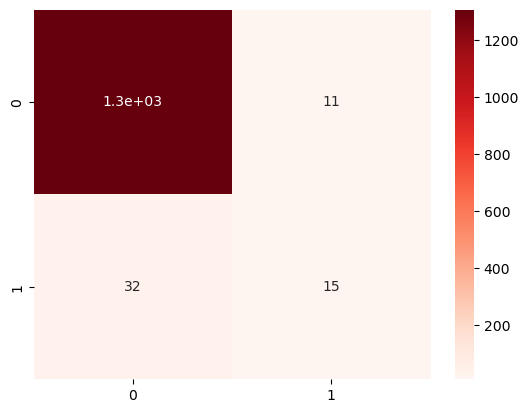


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1317
           1       0.58      0.32      0.41        47

    accuracy                           0.97      1364
   macro avg       0.78      0.66      0.70      1364
weighted avg       0.96      0.97      0.96      1364



In [31]:
y_pred4 = model_KNN.predict(X_test)
accr4 = accuracy_score(y_test,y_pred4)
print("Accuracy:", accr4)

cm = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='Reds')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred4))

Precision value equal to 61% for 1, means that 61 Non-Bankrupted Company are classified as Non-Bankrupted Comapny and 39% of them are classified incorrectly. While precision value for positive reviews equal to 98% for 0, it means that 98% of Bankrupted Company are classified as Bankrupted Company and 2% of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 99% from the dataset are True for Bankrupted Company, and 30% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our K-Nearest Neighbours model able to predict 98% correctly for negative reviews and 40% correctly for positive reviews.

In [32]:
# Cross Validation for K-Nearest Neighbours Classifier

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_KNN,X,y,cv=10)
print("Accuracy Score:", scores.mean())
print("Standard Deviation:", scores.std())

Accuracy Score: 0.9760966923749359
Standard Deviation: 0.006783102987587443


After Performing Cross Validation as K = 10 The accuracy is 97.69%
from which we can determine that K-Nearest Neighbour Model is not overfitted

### 6. Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
Rn = RandomForestClassifier()
model_Rn = Rn.fit(X_train,y_train)
model_Rn

RandomForestClassifier()

Accuracy: 0.9736070381231672
Confusion Matrix
[[1313    4]
 [  32   15]]


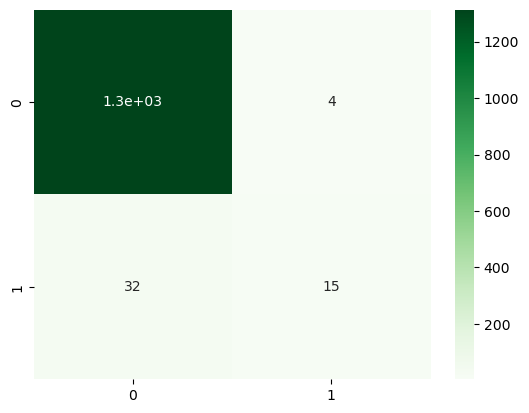


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1317
           1       0.79      0.32      0.45        47

    accuracy                           0.97      1364
   macro avg       0.88      0.66      0.72      1364
weighted avg       0.97      0.97      0.97      1364



In [34]:
y_pred5 = model_Rn.predict(X_test)
accr5 = accuracy_score(y_test,y_pred5)
print("Accuracy:", accr5)

cm = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='Greens')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred5))

Precision value equal to 82% for 1, means that 82% Non-Bankrupted Company are classified as Non-Bankrupted Comapny and 18% of them are classified incorrectly. While precision value for positive reviews equal to 98% for 0, it means that 98% of Bankrupted Company are classified as Bankrupted Company and 2% of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True for Bankrupted Company, and 38% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Random Forest model able to predict 99% correctly for negative reviews and 52% correctly for positive reviews.

In [35]:
# Cross Validation for Random Forest

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_Rn,X,y,cv=10)
print("Accuracy Score:", scores.mean())
print("Standard Deviation:", scores.std())

Accuracy Score: 0.9802035560952713
Standard Deviation: 0.006464445090851478


After Performing Cross Validation as K = 10 The accuracy is 98.09%
from which we can determine that Random Forest Model is not overfitted

### 7. XGboost Classifier

In [36]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
from xgboost import XGBClassifier
XGb = XGBClassifier()
model7 = XGb.fit(X_train,y_train)
model7

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.9831378299120235
Confusion Matrix
[[1314    3]
 [  20   27]]


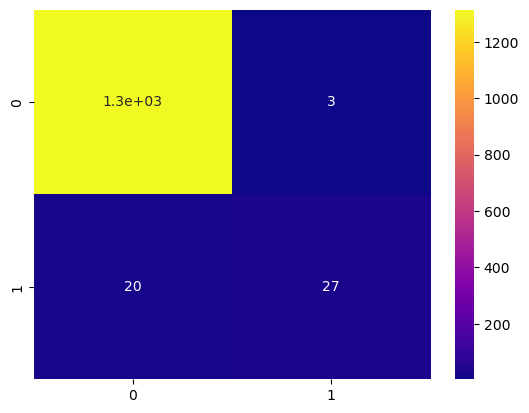


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1317
           1       0.90      0.57      0.70        47

    accuracy                           0.98      1364
   macro avg       0.94      0.79      0.85      1364
weighted avg       0.98      0.98      0.98      1364



In [38]:
y_pred7 = model7.predict(X_test)
accr7 =accuracy_score(y_test,y_pred7)
print("Accuracy:", accr7)

cm = confusion_matrix(y_test, y_pred7)
print("Confusion Matrix")
print(cm)
sns.heatmap(cm,annot=True,cmap='plasma')
plt.show()

# Classification Report 

print("\nClassification Report:\n",classification_report(y_test, y_pred7))

Precision value equal to 88% for 1, means that 88% Non-Bankrupted Company are classified as Non-Bankrupted Comapny and 12% of them are classified incorrectly. While precision value for positive reviews equal to 99% for 0, it means that 99% of Bankrupted Company are classified as Bankrupted Company and 1% of them are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True for Bankrupted Company, and 60% from the dataset are True Positive for Non-Bankrupted Company.

F1-score value measures how many times the model made a correct prediction accurately. Our Xgboost Classifier model able to predict 99% correctly for negative reviews and 71% correctly for positive reviews.

In [39]:
# Cross Validation for XGBClassifiers

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model7,X,y,cv=10)
print("Accuracy Score:", scores.mean())
print("Standard Deviation:", scores.std())

Accuracy Score: 0.9870956976328584
Standard Deviation: 0.005555312868503382


After Performing Cross Validation as K = 10 The accuracy is 98.47%
from which we can determine that XCboost Classifier Model is not overfitted


In [40]:
# # Accuracy of each Model

# l1 = [accr, accr1, accr2, accr3, accr4, accr5, accr7]
# l2 = ["Logistic regression", "Decision Tree Classifier", "Support Vector Classifier", "Gaussian Naive Bayes Classifier", "K-Nearest Neighbours Classifier", "Random Forest Classifier", "XGboost Classifier"]
# for i in l1:
#     for j in l2:
#         if(l1[i] == l2[j]):
#             print("Accuracy of {}".format(j), round(i*100, 2))

In [41]:
# Accuracy of each Model

print("Accuracy of Logistic Regression:", round(accr*100, 2))
print("Accuracy of Decision Tree Classifier:", round(accr1*100, 2))
print("Accuracy of Support Vector Classifier:", round(accr2*100, 2))
print("Accuracy of Gaussian Naive Bayes Classifier:", round(accr3*100, 2))
print("Accuracy of K-Nearest Neighbours Classifier:", round(accr4*100, 2))
print("Accuracy of Random Forest Classifier:", round(accr5*100, 2))
print("Accuracy of XGboost Classifier:", round(accr7*100, 2))

Accuracy of Logistic Regression: 96.55
Accuracy of Decision Tree Classifier: 97.14
Accuracy of Support Vector Classifier: 98.75
Accuracy of Gaussian Naive Bayes Classifier: 94.28
Accuracy of K-Nearest Neighbours Classifier: 96.85
Accuracy of Random Forest Classifier: 97.36
Accuracy of XGboost Classifier: 98.31


#### As we can see that, Support Vector Classifier gives best accuracy for this model out of all other models

So we can use SVM Classifier for deployment.